Epoch 1/100
3/3 [==============================] - 1s 78ms/step - loss: 4408.8433 - val_loss: 2898.5010
Epoch 2/100
3/3 [==============================] - 0s 13ms/step - loss: 4351.1748 - val_loss: 2850.2515
Epoch 3/100
3/3 [==============================] - 0s 13ms/step - loss: 4289.7412 - val_loss: 2793.8181
Epoch 4/100
3/3 [==============================] - 0s 14ms/step - loss: 4212.5059 - val_loss: 2721.5300
Epoch 5/100
3/3 [==============================] - 0s 14ms/step - loss: 4105.3501 - val_loss: 2623.6477
Epoch 6/100
3/3 [==============================] - 0s 13ms/step - loss: 3938.5918 - val_loss: 2471.1047
Epoch 7/100
3/3 [==============================] - 0s 14ms/step - loss: 3590.8845 - val_loss: 2330.1125
Epoch 8/100
3/3 [==============================] - 0s 14ms/step - loss: 2141.8127 - val_loss: 3089.5540
Epoch 9/100
3/3 [==============================] - 0s 14ms/step - loss: 317.1616 - val_loss: 1669.2759
Epoch 10/100
3/3 [==============================] - 0s 15ms/step 

3/3 [==============================] - 0s 14ms/step - loss: 36.3417 - val_loss: 27.4702
Epoch 82/100
3/3 [==============================] - 0s 13ms/step - loss: 27.6427 - val_loss: 28.2504
Epoch 83/100
3/3 [==============================] - 0s 13ms/step - loss: 49.5216 - val_loss: 39.0400
Epoch 84/100
3/3 [==============================] - 0s 13ms/step - loss: 30.9178 - val_loss: 53.3113
Epoch 85/100
3/3 [==============================] - 0s 13ms/step - loss: 31.2261 - val_loss: 33.6638
Epoch 86/100
3/3 [==============================] - 0s 13ms/step - loss: 33.7088 - val_loss: 33.6153
Epoch 87/100
3/3 [==============================] - 0s 14ms/step - loss: 35.2961 - val_loss: 45.8806
Epoch 88/100
3/3 [==============================] - 0s 15ms/step - loss: 31.8641 - val_loss: 19.7054
Epoch 89/100
3/3 [==============================] - 0s 14ms/step - loss: 41.2003 - val_loss: 40.1325
Epoch 90/100
3/3 [==============================] - 0s 14ms/step - loss: 29.2208 - val_loss: 27.3813
Epo

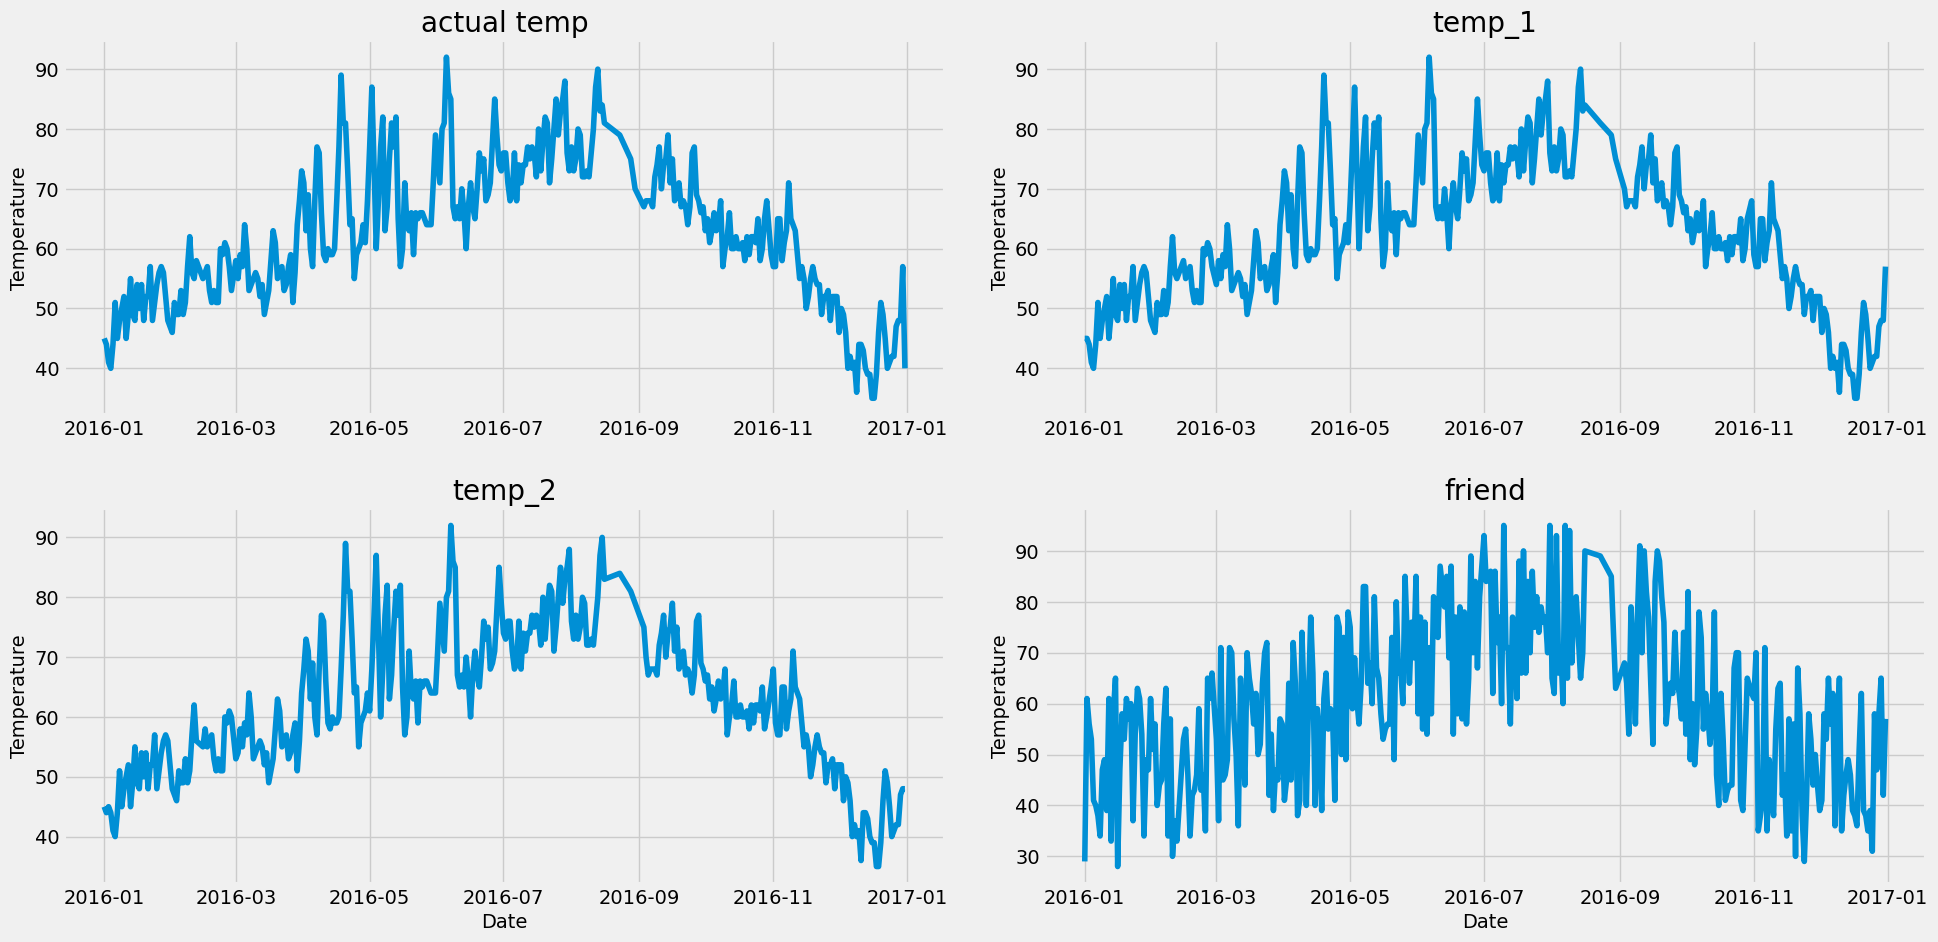

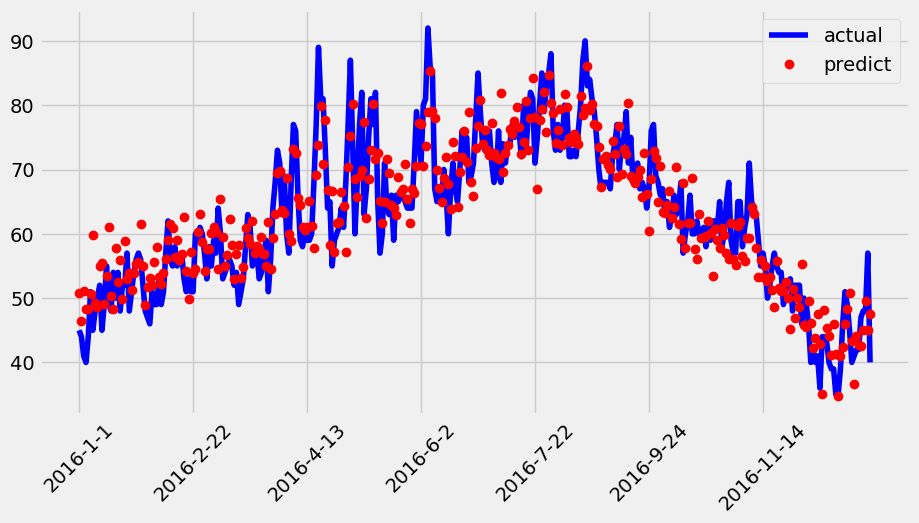

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
# 使用keras建模方法
from tensorflow.keras import layers
import warnings
warnings.filterwarnings('ignore')
 
filepath = 'temps.csv'
features = pd.read_csv(filepath) # 读取csv数据
features.head() # 查看数据格式


import datetime
# 获取年月日数据
years = features['year']
months = features['month']
days = features['day']
 
# 将年月日拼接在一起--字符串类型
dates = []  # 用于存放组合后的日期
for year,month,day in zip(years,months,days):
    date = str(year)+'-'+str(month)+'-'+str(day)  # 年月日之间用'-'向连接
    dates.append(date)
 
# 转变成datetime格式
times = []
for date in dates:
    time = datetime.datetime.strptime(date,'%Y-%m-%d')
    times.append(time)
# 看一下前10行
times[:10]


# 指定绘图风格
plt.style.use('fivethirtyeight')
# 设置画布，2行2列的画图窗口，第一行画ax1和ax2，第二行画ax3和ax4
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(20,10))
# ==1== actual特征列
ax1.plot(times,features['actual'])
# 设置x轴y轴标签和title标题
ax1.set_xlabel('');ax1.set_ylabel('Temperature');ax1.set_title('actual temp')
# ==2== 前一天的温度
ax2.plot(times,features['temp_1'])
# 设置x轴y轴标签和title标题
ax2.set_xlabel('');ax2.set_ylabel('Temperature');ax2.set_title('temp_1')
# ==3== 前2天的温度
ax3.plot(times,features['temp_2'])
# 设置x轴y轴标签和title标题
ax3.set_xlabel('Date');ax3.set_ylabel('Temperature');ax3.set_title('temp_2')
# ==4== friend
ax4.plot(times,features['friend'])
# 设置x轴y轴标签和title标题
ax4.set_xlabel('Date');ax4.set_ylabel('Temperature');ax4.set_title('friend')
# 轻量化布局调整绘图
plt.tight_layout(pad=2)


# week列是字符串，重新编码，变成数值型
features = pd.get_dummies(features)
features.head()


# 获取目标值y，从Series类型变成数组类型
labels = np.array(features['actual'])
# 获取特征值x，即在原数据中去掉目标值列，默认删除行，需要指定轴axis=1指向列
features = features.drop('actual',axis=1)
# 把features从DateFrame变成数组类型
features = np.array(features)
features.shape


# 导入标准化方法库
from sklearn import preprocessing
input_features = preprocessing.StandardScaler().fit_transform(features)
input_features


# 构建层次
model = tf.keras.Sequential()
# 隐含层1设置16层，权重初始化方法设置为随机高斯分布，加入正则化惩罚项l2
model.add(layers.Dense(16,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# 隐含层2设置32层
model.add(layers.Dense(32,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)))
# 输出层设置为1，即输出一个预测结果
model.add(layers.Dense(1,kernel_initializer='random_normal',kernel_regularizer=tf.keras.regularizers.l2(0.01)))


# 优化器和损失函数
model.compile(optimizer=tf.keras.optimizers.SGD(0.001),loss='mean_squared_error')


# 开始训练
model.fit(input_features,labels,validation_split=0.25,epochs=100,batch_size=128)

model.summary()

# 预测模型结果
predict = model.predict(input_features)

# 真实值，蓝色实现
fig = plt.figure(figsize=(10,5))
axes = fig.add_subplot(111)
axes.plot(dates,labels,'b-',label='actual')
# 预测值，红色散点
axes.plot(dates,predict,'ro',label='predict')
axes.set_xticks(dates[::50])
axes.set_xticklabels(dates[::50],rotation=45)
 
plt.legend()
plt.show()